In [1]:
# 텍스트 마이닝은 위키피디아에 검색하면 '텍스트에서 고품질 정보를 추출하는 과정'이라는 정의를 볼 수 있다.
# 고품질 정보는 정확히 무엇이라고 하진 않았지만 '패턴이나 트렌드'를 통해 얻어지는 것이다.
# 즉,텍스트 마이닝이란 텍스트로부터 패턴이나 트렌드를 분석해서 추출한 고품질의 정보이다.
# 패턴을 찾기 위해선 '통계적 패턴 학습'으로 머신러닝에 해당한다.

# 정리하면, 텍스트 마이닝은 '자연어 처리 기법을 이용해 텍스트를 정형화된 데이터로 변환하고, 머신러닝 기법을 적용해 우리가 관심이 있는
# 어떤 사건을 예측하고자 하는 방법론'이라 할 수 있다.

# 텍스트 전처리하는 이유
# 각각의 단어를 이해하고 그 단어들의 순서에 따라 의미를 이해한다. 따라서 컴퓨터에게 어떤 문장을 이해시키고 싶다면 하나의 문자열로
# 이루어진 문장 혹은 문서를 단어 단위로 나눈 후에 이 단어들의 리스트 형태로 변환해주어야 한다.

# 텍스트 전처리
#'주어진 텍스트에서 노이즈와 같이 불필요한 부분을 제거하고, 문장을 표준 단어들로 분리한 후에, 각 단어의 품사를 파악하는 것'까지를 의미한다.
# 1. 정제  2. 토큰화   3. 정규화   4. 품사 태깅

In [2]:
# 필요한 nltk 라이브러리를 다운로드
import nltk
nltk.download('punkt')
nltk.download('webtext')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Leedonghoon\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package webtext to
[nltk_data]     C:\Users\Leedonghoon\AppData\Roaming\nltk_data...
[nltk_data]   Package webtext is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Leedonghoon\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Leedonghoon\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Leedonghoon\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [3]:
# 문장 토큰화 (텍스트를 원하는 단위로 나누는 작업)
para ="Hello everyone. It's good to see you. Let's start our text mining class!"

from nltk.tokenize import sent_tokenize

# 주어진 텍스트를 문장 단위로 토큰화. 주로 . ! ? 등을 이용
print(sent_tokenize(para))

['Hello everyone.', "It's good to see you.", "Let's start our text mining class!"]


In [4]:
# 프랑스어
paragraph_french = """Je t'ai demand si tu m'aimais bien, Tu m'a r pondu non.
Je t'ai demand si j' tais jolie, Tu m'a r pondu non.
Je t'ai demand si j' tai dans ton coeur, Tu m'a r pondu non."""

import nltk.data
tokenizer = nltk.data.load('tokenizers/punkt/french.pickle')
print(tokenizer.tokenize(paragraph_french))

["Je t'ai demand si tu m'aimais bien, Tu m'a r pondu non.", "Je t'ai demand si j' tais jolie, Tu m'a r pondu non.", "Je t'ai demand si j' tai dans ton coeur, Tu m'a r pondu non."]


In [5]:
# 한국어
para_kor = "안녕하세요, 여러분. 만나서 반갑습니다. 이제 텍스트마이닝 클래스를 시작해봅시다!"

# 한국어에 대해서도 sentence tokenizer는 잘 작동함.
print(sent_tokenize(para_kor))

['안녕하세요, 여러분.', '만나서 반갑습니다.', '이제 텍스트마이닝 클래스를 시작해봅시다!']


In [6]:
# 단어 토큰화(문장 단위의 분석이 필요할 때)
from nltk.tokenize import word_tokenize

# 주어진 text를 word 단위로 tokenize 함
print(word_tokenize(para))

['Hello', 'everyone', '.', 'It', "'s", 'good', 'to', 'see', 'you', '.', 'Let', "'s", 'start', 'our', 'text', 'mining', 'class', '!']


In [7]:
from nltk.tokenize import WordPunctTokenizer
print(WordPunctTokenizer().tokenize(para))

['Hello', 'everyone', '.', 'It', "'", 's', 'good', 'to', 'see', 'you', '.', 'Let', "'", 's', 'start', 'our', 'text', 'mining', 'class', '!']


In [8]:
print(word_tokenize(para_kor))
# 한국어 텍스트를 정확하게 토큰화하려면 영어와는 다른 방법이 필요하다. 공백과 같이 단어를 구분해 주는 것들을 단어 경계(word boundary)
# 라고 한다. 공백만으로 토큰화가 잘 되지 않는다면 새로운 방법으로 단어를 분리해야 하고 이와 같은 작업을 단어 분할(word segmentation)
# 이라고 한다. 한국어에 대해서는 다양한 단어 분할 방법을 적용해야 할 필요가 있다.

['안녕하세요', ',', '여러분', '.', '만나서', '반갑습니다', '.', '이제', '텍스트마이닝', '클래스를', '시작해봅시다', '!']


In [9]:
###### 정규표현식을 이용한 토큰화
import re
re.findall("[abc]", "How are you, boy?")
# re패키지의 findall()함수는 첫째 인수의 패턴을 둘째 인수인 문자열에서 검색해서 매칭되는 모든 값들을 반환해준다.

['a', 'b']

In [10]:
re.findall("[0123456789]", "3a7b5c9d")

['3', '7', '5', '9']

In [11]:
# 모든 알파벳을 검색하고 싶다면 [a-zA-Z], 알파벳+숫자 [a-zA-Z0-9_], 이를 줄임 표현으로 [\w]를 사용하면 된다.
re.findall("[\w]", "3a 7b_ '.^&5c9d")

['3', 'a', '7', 'b', '_', '5', 'c', '9', 'd']

In [12]:
# 메타 문자 + 는 한 번 이상의 반복을 의미한다. 
re.findall("[_]+", "a_b, c__d, e___f")
# \w 에는 공백(스페이스)이 포함되지 않는다. + : 1번 이상 반복되는 문자열

['_', '__', '___']

In [13]:
re.findall("[\w]+", "How are you, boy?")
# 공백이나 쉼표 등으로 구분되는 단어 찾을 수 있음

['How', 'are', 'you', 'boy']

In [14]:
re.findall("[o]{2,4}", "oh, hoow are yooooou, boooooooy?")
# { } : 정확한 반복 횟수 지정, o가 2~4회 반복된 문자열,

['oo', 'oooo', 'oooo', 'ooo']

In [15]:
from nltk.tokenize import RegexpTokenizer

# regular expression(정규식)을 이용한 tokenizer
# 단어 단위로 tokenize \w: 문자나 숫자를 의미. 즉 문자나 숫자 혹은 '가 반복되는 것을 찾아냄.
tokenizer = RegexpTokenizer("[\w]+")

# can't를 하나의 단어로 인식
print(tokenizer.tokenize("Sorry, I can't go there."))

['Sorry', 'I', 'can', 't', 'go', 'there']


In [16]:
# '를 포함해 세 글자 이상의 단어들만 골라내고 싶을 때, {} : 어떤 수 이상을 표현하고 싶을 때
text1 = "Sorry, I can't go there."
tokenizer = RegexpTokenizer("[\w']{3,}")
print(tokenizer.tokenize(text1.lower()))

['sorry', "can't", 'there']


In [17]:
# 노이즈와 불용어 제거
from nltk.corpus import stopwords # 일반적으로 분석대상이 아닌 단어들
english_stops = set(stopwords.words('english')) # 반복이 되지 않도록 set으로 변환

text1 = "Sorry, I couldn't go to movie yesterday."

tokenizer = RegexpTokenizer("[\w']+")
tokens = tokenizer.tokenize(text1.lower()) # word_tokenize로 토큰화

# stopwords를 제외한 단어들만으로 list를 생성
result = [word for word in tokens if word not in english_stops]

print(result)

['sorry', 'go', 'movie', 'yesterday']


In [18]:
# nltk가 제공하는 영어 stopword를 확인
print(english_stops)

{'through', 'being', "mustn't", 'how', "won't", 'between', 'd', 'ain', 'here', 'his', "you'll", 'her', 'which', 'who', 'you', 'before', 'about', 'she', 'he', 'or', 'during', 'was', 'your', "wouldn't", "don't", 'more', 'against', "that'll", 'down', 'with', "aren't", 'is', 'other', 'such', 'this', 'nor', 'am', 'mightn', 'most', 'then', 'what', 'while', 'below', 'can', 'same', 've', 'have', "it's", "haven't", 'these', 'it', 'yours', 'be', 'yourselves', 'hers', "you've", 'me', 'any', "hadn't", 'had', 'all', 'they', "needn't", 'my', 'once', 's', 'hasn', 'to', 'over', 'each', 'into', 'didn', 'under', 'will', "weren't", 'theirs', 'as', 'until', 'their', 'no', "you're", 'yourself', 'further', "you'd", 'very', 'and', 'there', 'were', 'off', "doesn't", 'couldn', "mightn't", 'haven', 'that', 'those', 'because', "didn't", 'ourselves', 'again', 'just', 'both', 'myself', 'do', 're', 'on', 'we', 'himself', 'where', 'but', 'i', 'few', 'a', 'don', 'wouldn', 'itself', "couldn't", 'at', 'mustn', 'has', '

In [19]:
# 자신만의 stopwords를 만들고 이용
# 한글처리에도 유용함
# 나만의 stopword를 리스트로 정의
my_stopword = ['i','go','to']

In [20]:
result = [word for word in tokens if word not in my_stopword]
print(result)

['sorry', "couldn't", 'movie', 'yesterday']


In [21]:
# 정규화 -> 어간추출, 표제어 추출
# 어간추출 (어형이 변형된 단어로부터 접사 등을 제거하고 그 단어의 어간을 분리해 내는 작업, 어간 + 어미)
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
print(stemmer.stem('cooking'), stemmer.stem('cookery'), stemmer.stem('cookbooks'))

cook cookeri cookbook


In [22]:
from nltk.tokenize import word_tokenize

para = "Hello everyone. It's good to see you. Let's start our text mining class!"
tokens = word_tokenize(para) #토큰화 실행
print(tokens)
result = [stemmer.stem(token) for token in tokens] #모든 토큰에 대해 스테밍 실행
print(result)

['Hello', 'everyone', '.', 'It', "'s", 'good', 'to', 'see', 'you', '.', 'Let', "'s", 'start', 'our', 'text', 'mining', 'class', '!']
['hello', 'everyon', '.', 'it', "'s", 'good', 'to', 'see', 'you', '.', 'let', "'s", 'start', 'our', 'text', 'mine', 'class', '!']


In [23]:
from nltk.stem import LancasterStemmer
stemmer = LancasterStemmer()
print(stemmer.stem('cooking'), stemmer.stem('cookery'), stemmer.stem('cookbooks'))

cook cookery cookbook


In [24]:
# 표제어 추출
# 주어진 단어를 기본형으로 변환하는 것, 무조건 품사 지정해야함
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
print(lemmatizer.lemmatize('cooking'))
print(lemmatizer.lemmatize('cooking', pos='v')) #품사를 지정
print(lemmatizer.lemmatize('cookery'))
print(lemmatizer.lemmatize('cookbooks'))

cooking
cook
cookery
cookbook


In [25]:
# lemmatizing과 stemming 비교
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
print('stemming result:', stemmer.stem('believes'))
print('lemmatizing result:', lemmatizer.lemmatize('believes'))
print('lemmatizing result:', lemmatizer.lemmatize('believes', pos='v'))

stemming result: believ
lemmatizing result: belief
lemmatizing result: believe


In [26]:
# 품사 태깅 (형태소에 대해 품사를 파악해 부착하는 작업)
# 형태소 : 의미를 가진 가장 작은 말의 단위 ex) 책 + 가방
import nltk
from nltk.tokenize import word_tokenize

tokens = word_tokenize("Hello everyone. It's good to see you. Let's start out text mining class!")
print(nltk.pos_tag(tokens))

[('Hello', 'NNP'), ('everyone', 'NN'), ('.', '.'), ('It', 'PRP'), ("'s", 'VBZ'), ('good', 'JJ'), ('to', 'TO'), ('see', 'VB'), ('you', 'PRP'), ('.', '.'), ('Let', 'VB'), ("'s", 'POS'), ('start', 'VB'), ('out', 'RP'), ('text', 'NN'), ('mining', 'NN'), ('class', 'NN'), ('!', '.')]


In [27]:
nltk.help.upenn_tagset('CC') # 품사약어의 의미와 설명

CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet


In [28]:
my_tag_set = ['NN', 'VB', 'JJ']
my_words = [word for word, tag in nltk.pos_tag(tokens) if tag in my_tag_set]
print(my_words)

['everyone', 'good', 'see', 'Let', 'start', 'text', 'mining', 'class']


In [29]:
words_with_tag = ['/'.join(item) for item in nltk.pos_tag(tokens)]
print(words_with_tag)

['Hello/NNP', 'everyone/NN', './.', 'It/PRP', "'s/VBZ", 'good/JJ', 'to/TO', 'see/VB', 'you/PRP', './.', 'Let/VB', "'s/POS", 'start/VB', 'out/RP', 'text/NN', 'mining/NN', 'class/NN', '!/.']


In [30]:
# 한글 형태소 분석과 품사 태깅
sentence = '''절망의 반대가 희망은 아니다.
어두운 밤하늘에 별이 빛나듯
희망은 절망 속에 싹트는 거지
만약에 우리가 희망함이 적다면
그 누가 세상을 비출어줄까.
정희성, 희망 공부'''

tokens = word_tokenize(sentence)
print(tokens)
print(nltk.pos_tag(tokens))

['절망의', '반대가', '희망은', '아니다', '.', '어두운', '밤하늘에', '별이', '빛나듯', '희망은', '절망', '속에', '싹트는', '거지', '만약에', '우리가', '희망함이', '적다면', '그', '누가', '세상을', '비출어줄까', '.', '정희성', ',', '희망', '공부']
[('절망의', 'JJ'), ('반대가', 'NNP'), ('희망은', 'NNP'), ('아니다', 'NNP'), ('.', '.'), ('어두운', 'VB'), ('밤하늘에', 'JJ'), ('별이', 'NNP'), ('빛나듯', 'NNP'), ('희망은', 'NNP'), ('절망', 'NNP'), ('속에', 'NNP'), ('싹트는', 'NNP'), ('거지', 'NNP'), ('만약에', 'NNP'), ('우리가', 'NNP'), ('희망함이', 'NNP'), ('적다면', 'NNP'), ('그', 'NNP'), ('누가', 'NNP'), ('세상을', 'NNP'), ('비출어줄까', 'NNP'), ('.', '.'), ('정희성', 'NN'), (',', ','), ('희망', 'NNP'), ('공부', 'NNP')]


In [31]:
import os
print('JAVA_HOME' in os.environ)
os.environ['JAVA_HOME'] = r'C:\Program Files\Java\jdk-20\bin\server'

True


In [32]:
from konlpy.tag import Okt
t = Okt()

In [33]:
print('형태소:',t.morphs(sentence))
print()
print('명사:',t.nouns(sentence))
print()
print('품사 태깅 결과:',t.pos(sentence))

형태소: ['절망', '의', '반대', '가', '희망', '은', '아니다', '.', '\n', '어', '두운', '밤하늘', '에', '별', '이', '빛나듯', '\n', '희망', '은', '절망', '속', '에', '싹트는', '거지', '\n', '만약', '에', '우리', '가', '희망', '함', '이', '적다면', '\n', '그', '누가', '세상', '을', '비출어줄까', '.', '\n', '정희성', ',', '희망', '공부']

명사: ['절망', '반대', '희망', '어', '두운', '밤하늘', '별', '희망', '절망', '속', '거지', '만약', '우리', '희망', '함', '그', '누가', '세상', '정희성', '희망', '공부']

품사 태깅 결과: [('절망', 'Noun'), ('의', 'Josa'), ('반대', 'Noun'), ('가', 'Josa'), ('희망', 'Noun'), ('은', 'Josa'), ('아니다', 'Adjective'), ('.', 'Punctuation'), ('\n', 'Foreign'), ('어', 'Noun'), ('두운', 'Noun'), ('밤하늘', 'Noun'), ('에', 'Josa'), ('별', 'Noun'), ('이', 'Josa'), ('빛나듯', 'Verb'), ('\n', 'Foreign'), ('희망', 'Noun'), ('은', 'Josa'), ('절망', 'Noun'), ('속', 'Noun'), ('에', 'Josa'), ('싹트는', 'Verb'), ('거지', 'Noun'), ('\n', 'Foreign'), ('만약', 'Noun'), ('에', 'Josa'), ('우리', 'Noun'), ('가', 'Josa'), ('희망', 'Noun'), ('함', 'Noun'), ('이', 'Josa'), ('적다면', 'Verb'), ('\n', 'Foreign'), ('그', 'Noun'), ('누가', 'Noun'), ('세상

In [34]:
# 그래프와 워드 클라우드
import nltk
nltk.download('gutenberg')

from nltk.corpus import gutenberg
file_names = gutenberg.fileids()
# 파일 제목을 읽어온다.

print(file_names)

['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']


[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\Leedonghoon\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


In [35]:
doc_alice = gutenberg.open('carroll-alice.txt').read()
print('#Num of characters used:',len(doc_alice)) # 사용된 문자의 수
print('#Text sample:')
print(doc_alice[:500]) # 앞의 500자만 출력

#Num of characters used: 144395
#Text sample:
[Alice's Adventures in Wonderland by Lewis Carroll 1865]

CHAPTER I. Down the Rabbit-Hole

Alice was beginning to get very tired of sitting by her sister on the
bank, and of having nothing to do: once or twice she had peeped into the
book her sister was reading, but it had no pictures or conversations in
it, 'and what is the use of a book,' thought Alice 'without pictures or
conversation?'

So she was considering in her own mind (as well as she could, for the
hot day made her feel very sleepy an


In [36]:
from nltk.tokenize import word_tokenize
tokens_alice = word_tokenize(doc_alice) # 토큰화 실행

print('#Num of tokens used:', len(tokens_alice))
print('#Token sample:')
print(tokens_alice[:20])

#Num of tokens used: 33494
#Token sample:
['[', 'Alice', "'s", 'Adventures', 'in', 'Wonderland', 'by', 'Lewis', 'Carroll', '1865', ']', 'CHAPTER', 'I', '.', 'Down', 'the', 'Rabbit-Hole', 'Alice', 'was', 'beginning']


In [37]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

# 모든 토큰에 대해 스테밍 실행
stem_tokens_alice = [stemmer.stem(token) for token in tokens_alice]

print('#Num of tokens after stemming:', len(stem_tokens_alice))
print('#Token sample:')
print(stem_tokens_alice[:20])

#Num of tokens after stemming: 33494
#Token sample:
['[', 'alic', "'s", 'adventur', 'in', 'wonderland', 'by', 'lewi', 'carrol', '1865', ']', 'chapter', 'i', '.', 'down', 'the', 'rabbit-hol', 'alic', 'wa', 'begin']


In [38]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# 모든 토큰에 대해 스테밍 실행
lem_tokens_alice = [lemmatizer.lemmatize(token) for token in tokens_alice]

print('#Num of tokens after lemmatization:', len(lem_tokens_alice))
print('#Token sample:')
print(lem_tokens_alice[:20])

#Num of tokens after lemmatization: 33494
#Token sample:
['[', 'Alice', "'s", 'Adventures', 'in', 'Wonderland', 'by', 'Lewis', 'Carroll', '1865', ']', 'CHAPTER', 'I', '.', 'Down', 'the', 'Rabbit-Hole', 'Alice', 'wa', 'beginning']


In [39]:
# WordNetTokenizer를 사용했을 때 보다 토큰 수가 현저히 줄어듦.
# '[',']' 사라지고 2자 이하의 글자들이 모두 제외됨

from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer("[\w']{3,}")

reg_tokens_alice = tokenizer.tokenize(doc_alice.lower())
print('#Num of tokens with RegexpTokenizer:', len(reg_tokens_alice))
print('#Token sample:')
print(reg_tokens_alice[:20])

#Num of tokens with RegexpTokenizer: 21616
#Token sample:
["alice's", 'adventures', 'wonderland', 'lewis', 'carroll', '1865', 'chapter', 'down', 'the', 'rabbit', 'hole', 'alice', 'was', 'beginning', 'get', 'very', 'tired', 'sitting', 'her', 'sister']


In [40]:
# 전처리
from nltk.corpus import stopwords # 일반적으로 분석대상이 아닌 단어들
english_stops = set(stopwords.words('english')) # 반복되지 않게 set으로 변환

# stopwords를 제외한 단어들만으로 리스트를 생성
result_alice = [word for word in reg_tokens_alice if word not in english_stops]

print('#Num of tokens after stopword elimination:', len(result_alice))
print('#Token sample:')
print(result_alice[:20])

#Num of tokens after stopword elimination: 12999
#Token sample:
["alice's", 'adventures', 'wonderland', 'lewis', 'carroll', '1865', 'chapter', 'rabbit', 'hole', 'alice', 'beginning', 'get', 'tired', 'sitting', 'sister', 'bank', 'nothing', 'twice', 'peeped', 'book']


In [41]:
# would, could, and는 딱히 필요해 보이지 않음

alice_word_count = dict()
for word in result_alice:
    alice_word_count[word] = alice_word_count.get(word,0) + 1
    
print('#Num of used words:', len(alice_word_count))

sorted_word_count = sorted(alice_word_count, key=alice_word_count.get, reverse=True)

print('#Top 20 high frequency words:')
for key in sorted_word_count[:20]: # 빈도수 상위 20개의 단어를 출력
    print(f'{repr(key)}: {alice_word_count[key]}', end=',')

#Num of used words: 2687
#Top 20 high frequency words:
'said': 462,'alice': 385,'little': 128,'one': 98,'know': 88,'like': 85,'went': 83,'would': 78,'could': 77,'thought': 74,'time': 71,'queen': 68,'see': 67,'king': 61,'began': 58,'turtle': 57,"'and": 56,'way': 56,'mock': 56,'quite': 55,

In [42]:
# 명사, 동사, 형용사만 추출
my_tag_set = ['NN', 'VB', 'VBD', 'JJ']
my_words = [word for word, tag in nltk.pos_tag(result_alice) if tag in my_tag_set]

alice_word_count = dict()
for word in my_words:
    alice_word_count[word] = alice_word_count.get(word, 0) + 1
    
print('#Num of used words:', len(alice_word_count))

sorted_word_count = sorted(alice_word_count, key=alice_word_count.get, reverse=True)

print('#Top 20 high frequency words:')
for key in sorted_word_count[:20]: # 빈도수 상위 20개의 단어를 출력
    print(f'{repr(key)}: {alice_word_count[key]}', end=',')

#Num of used words: 1726
#Top 20 high frequency words:
'said': 462,'alice': 293,'little': 124,'went': 83,'time': 71,'queen': 66,'began': 58,'way': 56,'turtle': 56,'mock': 55,'thought': 54,'thing': 49,'voice': 48,'head': 46,'gryphon': 45,'got': 44,'rabbit': 42,'looked': 42,'see': 42,'came': 40,

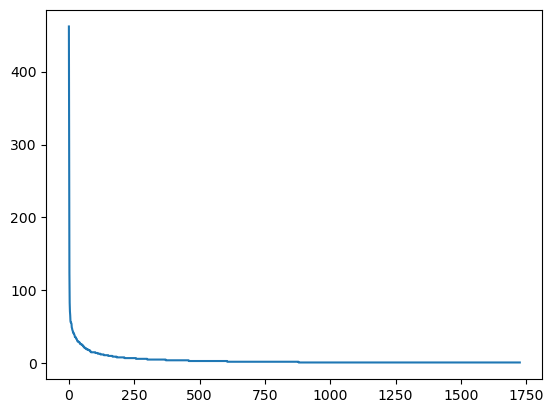

In [43]:
# 시각화
# 가독성이 안보임
# 상위 몇 개만 빈도수가 높고 나머지는 비슷함
# 이를 해결하기 위해 지프의 법칙 사용
import matplotlib.pyplot as plt
%matplotlib inline

# 정렬된 단어 리스트에 대해 빈도수를 가져와서 리스트 생성
w = [alice_word_count[key] for key in sorted_word_count]

plt.plot(w)
plt.show()

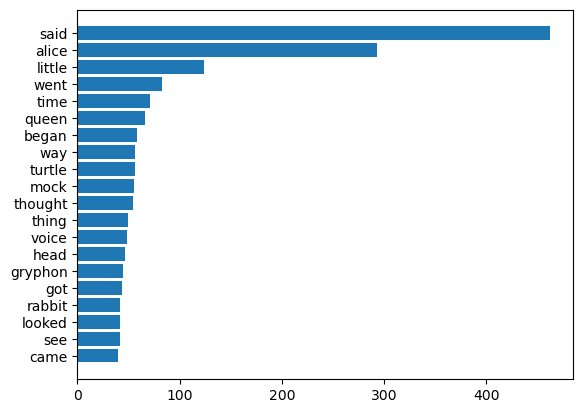

In [44]:
# 지프의 법칙
# 말뭉치의 단어들을 사용 빈도가 높은 순서대로 나열하면 단어의 사용 빈도는 단어의 순위에 반비례한다
n = sorted_word_count[:20][::-1] # 빈도수 상위 20개의 단어를 추출해 역순으로 정렬
w = [alice_word_count[key] for key in n] # 20개 단어에 대한 빈도
plt.barh(range(len(n)), w, tick_label = n) # 수평 막대그래프
plt.show()

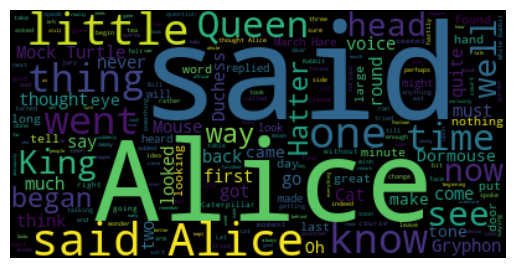

(200, 400, 3)

In [46]:
# 워드 클라우드 (pip install wordcloud)
# plt.imshow() 이미지 출력, 이미지를 읽어와서 출력하거나 프로그램에서 만든 이미지를 출력 혹은 넘파이 행렬로 된 데이터를 이미지로 출력
from wordcloud import WordCloud

# 워드 클라우드 이미지 생성
wordcloud= WordCloud().generate(doc_alice)

plt.axis('off')
plt.imshow(wordcloud, interpolation='bilinear') #이미지를 출력
plt.show()
wordcloud.to_array().shape

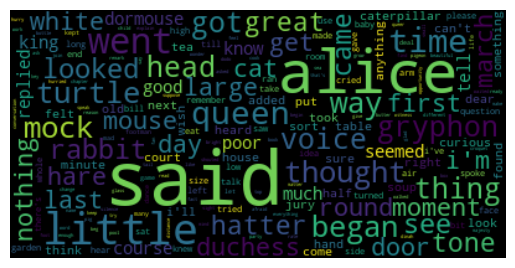

In [47]:
wordcloud = WordCloud(max_font_size = 60).generate_from_frequencies(alice_word_count)
plt.figure()
plt.axis('off')
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

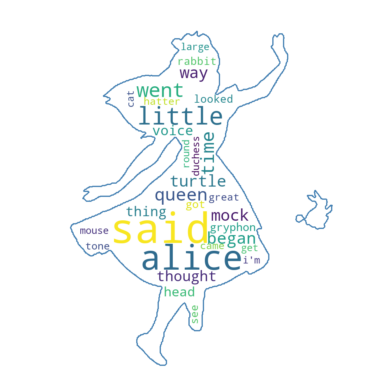

In [48]:
# 그림 따로 저장하기
import numpy as np
from PIL import Image

# 배경이미지를 불러와서 넘파이 array로 변환
text = open('alice.txt').read()
alice_mask = np.array(Image.open('alice_mask.png'))

wc = WordCloud(background_color='white', # 배경색 지정
              max_words = 30, # 출력할 최대 단어 수
              mask = alice_mask, # 배경으로 사용할 이미지
              contour_width=3, # 테두리 굵기
              contour_color='steelblue') # 테두리 색

wc.generate_from_frequencies(alice_word_count) # 워드 클라우드 생성

wc.to_file('alice.png') # 결과를 이미지 파일로 저장

#  화면에 결과를 출력
plt.figure()
plt.axis('off')
plt.imshow(wc, interpolation='bilinear')
plt.show()

In [49]:
# 한국어 문서에 대한 그래프와 워드 클라우드
from konlpy.corpus import kolaw
const_doc = kolaw.open('constitution.txt').read()

print(type(const_doc)) # 가져온 데이터의 type을 확인
print(len(const_doc))
print(const_doc[:600])

<class 'str'>
18884
대한민국헌법

유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4·19민주이념을 계승하고, 조국의 민주개혁과 평화적 통일의 사명에 입각하여 정의·인도와 동포애로써 민족의 단결을 공고히 하고, 모든 사회적 폐습과 불의를 타파하며, 자율과 조화를 바탕으로 자유민주적 기본질서를 더욱 확고히 하여 정치·경제·사회·문화의 모든 영역에 있어서 각인의 기회를 균등히 하고, 능력을 최고도로 발휘하게 하며, 자유와 권리에 따르는 책임과 의무를 완수하게 하여, 안으로는 국민생활의 균등한 향상을 기하고 밖으로는 항구적인 세계평화와 인류공영에 이바지함으로써 우리들과 우리들의 자손의 안전과 자유와 행복을 영원히 확보할 것을 다짐하면서 1948년 7월 12일에 제정되고 8차에 걸쳐 개정된 헌법을 이제 국회의 의결을 거쳐 국민투표에 의하여 개정한다.

       제1장 총강
  제1조 ① 대한민국은 민주공화국이다.
②대한민국의 주권은 국민에게 있고, 모든 권력은 국민으로부터 나온다.
  제2조 ① 대한민국의 국민이 되는 요건은 법률로 정한다.
②국가는 법률이 정하는 바에 의하여 재외국민을 보호할 의무를 진다.
  제3조 대한민


In [50]:
from konlpy.tag import Okt
t = Okt()
tokens_const = t.morphs(const_doc) # 형태소 단위로 tokenize

print('# 토큰의 수:', len(tokens_const))
print('# 앞 100개의 토큰')
print(tokens_const[:100])

# 토큰의 수: 8796
# 앞 100개의 토큰
['대한민국', '헌법', '\n\n', '유구', '한', '역사', '와', '전통', '에', '빛나는', '우리', '대', '한', '국민', '은', '3', '·', '1', '운동', '으로', '건립', '된', '대한민국', '임시정부', '의', '법', '통과', '불의', '에', '항거', '한', '4', '·', '19', '민주', '이념', '을', '계승', '하고', ',', '조국', '의', '민주', '개혁', '과', '평화', '적', '통일', '의', '사명', '에', '입', '각하', '여', '정의', '·', '인도', '와', '동포', '애', '로써', '민족', '의', '단결', '을', '공고', '히', '하고', ',', '모든', '사회', '적', '폐습', '과', '불의', '를', '타파', '하며', ',', '자율', '과', '조화', '를', '바탕', '으로', '자유민주', '적', '기', '본', '질서', '를', '더욱', '확고히', '하여', '정치', '·', '경제', '·', '사회', '·']


In [51]:
tokens_const = t.nouns(const_doc) # 형태소 단위로 tokenize 후 명사만 추출
print('#토큰의 수:',len(tokens_const))
print('#앞 100개의 토큰')
print(tokens_const[:100])

#토큰의 수: 3882
#앞 100개의 토큰
['대한민국', '헌법', '유구', '역사', '전통', '우리', '국민', '운동', '건립', '대한민국', '임시정부', '법', '통과', '불의', '항거', '민주', '이념', '계승', '조국', '민주', '개혁', '평화', '통일', '사명', '입', '각하', '정의', '인도', '동포', '애', '로써', '민족', '단결', '공고', '모든', '사회', '폐습', '불의', '타파', '자율', '조화', '바탕', '자유민주', '질서', '더욱', '정치', '경제', '사회', '문화', '모든', '영역', '각인', '기회', '능력', '최고', '도로', '발휘', '자유', '권리', '책임', '의무', '완수', '안', '국민', '생활', '향상', '기하', '밖', '항구', '세계', '평화', '인류', '공영', '이바지', '함', '우리', '우리', '자손', '안전', '자유', '행복', '확보', '것', '다짐', '제정', '차', '개정', '헌법', '이제', '국회', '의결', '국민투표', '개정', '제', '장', '강', '제', '대한민국', '민주공화국', '대한민국']


In [52]:
# 1자로 된 명사 삭제하여 의미있는 명사 추출
tokens_const = [token for token in tokens_const if len(token) > 1 ]
print('#토큰의 수:',len(tokens_const))
print('#앞 100개의 토큰')
print(tokens_const[:100])

#토큰의 수: 3013
#앞 100개의 토큰
['대한민국', '헌법', '유구', '역사', '전통', '우리', '국민', '운동', '건립', '대한민국', '임시정부', '통과', '불의', '항거', '민주', '이념', '계승', '조국', '민주', '개혁', '평화', '통일', '사명', '각하', '정의', '인도', '동포', '로써', '민족', '단결', '공고', '모든', '사회', '폐습', '불의', '타파', '자율', '조화', '바탕', '자유민주', '질서', '더욱', '정치', '경제', '사회', '문화', '모든', '영역', '각인', '기회', '능력', '최고', '도로', '발휘', '자유', '권리', '책임', '의무', '완수', '국민', '생활', '향상', '기하', '항구', '세계', '평화', '인류', '공영', '이바지', '우리', '우리', '자손', '안전', '자유', '행복', '확보', '다짐', '제정', '개정', '헌법', '이제', '국회', '의결', '국민투표', '개정', '대한민국', '민주공화국', '대한민국', '주권', '국민', '모든', '권력', '국민', '대한민국', '국민', '요건', '법률', '국가', '법률', '재외국민']


[('조직', 18), ('국회의원', 18), ('임기', 18), ('직무', 19), ('국무총리', 19), ('자유', 20), ('정부', 20), ('선거', 20), ('임명', 20), ('권리', 21), ('의원', 21), ('사항', 23), ('기타', 26), ('모든', 37), ('헌법', 53), ('국민', 61), ('국회', 68), ('국가', 73), ('대통령', 83), ('법률', 127)]


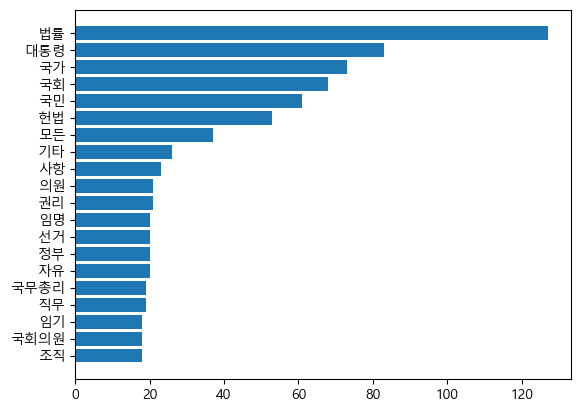

In [53]:
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
# 맥인 경우에는 아래와 같이 font_name을 지정
# font_name = 'AppleGothic'
rc('font', family= font_name)

const_cnt = {}
for word in tokens_const:
    const_cnt[word] = const_cnt.get(word,0) + 1
def word_graph(cnt, max_words=10):
    
    sorted_w = sorted(cnt.items(), key=lambda kv: kv[1])
    print(sorted_w[-max_words:])
    n, w = zip(*sorted_w[-max_words:])
    
    plt.barh(range(len(n)), w,tick_label=n)
    # plt.savafig('bar.png') # 필요한 경우, 그래프를 이미지 파일로 저장한다.
    plt.show()

word_graph(const_cnt, max_words=20)    

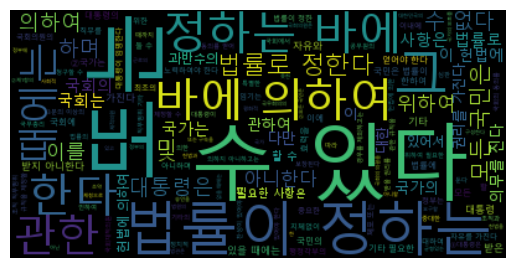

In [54]:
font_path = 'c:/Windows/Fonts/malgun.ttf'
wordcloud = WordCloud(font_path=font_path).generate(const_doc)

plt.axis('off')
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

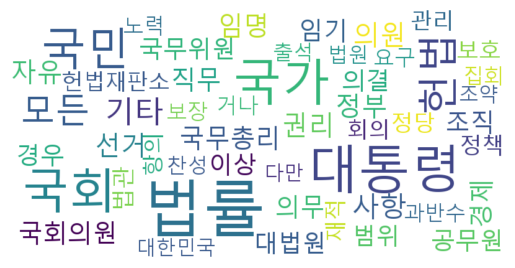

In [55]:
wordcloud = WordCloud(
    font_path= font_path,
    max_font_size = 100,
    width = 800, # 이미지 너비 지정
    height = 400, # 이미지 높이 지정
    background_color = 'white', #이미지 배경색 지정
    max_words=50)

# 원문이 아닌 형태소 분석 결과로부터 워드 클라우드를 생성
wordcloud.generate_from_frequencies(const_cnt)

wordcloud.to_file('const.png') # 생성한 이미지를 파일로 저장

plt.axis('off')
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()